
# Classification Evaluation Metrics


In [110]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [111]:

class Data(object):
    pass

df = Data
summ = Data


In [112]:
import helpdesk as hd

In [113]:
# Import writer class from csv module
from csv import writer

import pandas as pd, numpy as np
from datetime import datetime

import random, time


In [114]:

DEBUG = True
seed = 1919


In [115]:

pd.set_option('display.max_rows', 50);
pd.set_option('display.max_columns', 50);
pd.set_option('display.width', 200);


In [116]:
#%run "C040_MDL_NN w TensorFlow.ipynb"

In [117]:

#mid = 27823768
#mid = 27825824
#mid = 27826822

#mid = 27826849
#mid = 27826854

#mid = 27828481
#mid = 27828521

#mid = 27835204
#mid = 27835263

#mid = 27835398
mid = 27835456


In [118]:

#preds_dataset_name = 'predictions_dataset_2022-10-18.csv'
#preds_dataset_name = 'predictions_dataset_2022-10-27.csv'
preds_dataset_name = f'predictions_dataset_shed_{mid}_2022-12-04.csv'

df_preds = pd.read_csv(f'{fileloc}/{preds_dataset_name}')

print(df_preds.shape)
print()
print(df_preds.columns.values.tolist())


(588017, 10)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid']


In [119]:

dataset_base = f'dataset_base_2022-12-03.csv'

df_base = pd.read_csv(f'{fileloc}/{dataset_base}')

print(df_base.shape)
print()
print(df_base.columns.values.tolist())


(588017, 42)

['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [120]:

print(df_preds.shape)
print(df_base.shape)

df_eval_raw = pd.merge(df_preds, df_base, on = ['@id_DOG','@id_RACE'], how = 'inner')

print(df_eval_raw.shape)
print(df_eval_raw.columns.values.tolist())



(588017, 10)
(588017, 42)
(588017, 50)
['@id_DOG', 'DogName_x', 'y_runtime_x', 'RaceId_x', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid', 'DogName_y', 'y_runtime_y', 'RaceId_y', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last']


In [121]:
# Plotting the RaceGrade

In [122]:

print(pd.DataFrame(df_eval_raw.isna().sum()).transpose())


   @id_DOG  DogName_x  y_runtime_x  RaceId_x  @id_RACE  yearqtr  yearmon  ttflag  preds  mid  DogName_y  y_runtime_y  RaceId_y  Distance  RaceGrade  Track  Event_Dt  ft_sp  x_num_dogs  position  \
0        0          0            0         0         0        0        0       0      0    0          0            0         0         0          0      0         0      0           0         0   

   y_margin  y_pos  Winner_actual  Top3_actual  rand_mean  rand_uniform  position_random  Winner_random  Top3_random  position_fasttrack  Winner_fastrack  Top3_fastrack  rand_1  h_rand_1  p_rand_1  \
0         0      0              0            0          0             0                0              0            0                   0                0              0       0         0         0   

   rand_all_plc  h_rand_all_plc  p_rand_all_plc  rand_lay_last  h_rand_lay_last  p_rand_lay_last  ft_1  h_ft_1  p_ft_1  ft_all_plc  h_ft_all_plc  p_ft_all_plc  ft_lay_last  h_ft_lay_last  \
0             

In [123]:

df_eval_raw.describe()


,@id_DOG,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,preds,mid,y_runtime_y,RaceId_y,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
count,5.880170e+05,588017.000000,5.880170e+05,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.0,588017.000000,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.0,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000
mean,4.619574e+08,24.391543,7.386968e+08,7.386968e+08,202150.132277,202154.024741,5.768580,27835456.0,24.391543,7.386968e+08,16.986033,7.341031,4.168502,6.365959,4.168502,0.138901,0.416311,0.5,0.499795,4.170515,0.138637,0.415911,4.030804,0.144025,0.434047,0.138637,0.019404,-0.032898,0.350065,0.048158,-0.083066,0.138637,0.118872,-0.425160,0.144025,0.058374,-0.020107,0.365408,0.100523,-0.059634,0.104463,0.102424,-0.209428
std,1.145309e+08,4.945432,6.357945e+07,6.357945e+07,49.881592,49.782498,1.593609,0.0,4.945432,6.357945e+07,21.050777,0.893514,2.162005,4.765762,2.162005,0.345843,0.492947,0.0,0.999205,2.161872,0.345568,0.492879,2.089922,0.351115,0.495632,0.345568,0.137941,1.233311,0.476990,0.214101,1.922300,0.345568,0.323639,6.309887,0.351115,0.234450,0.428227,0.481545,0.300696,0.962507,0.305860,0.303205,8.257026
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,202101.000000,202101.000000,2.821671,27835456.0,10.000000,6.238619e+08,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.573843,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-752.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-709.500000
25%,4.005005e+08,20.540000,6.854128e+08,6.854128e+08,202102.000000,202106.000000,4.535979,27835456.0,20.540000,6.854128e+08,4.200000,7.000000,2.000000,2.500000,2.000000,0.000000,0.000000,0.5,-0.174808,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
50%,4.569441e+08,23.520000,7.402821e+08,7.402821e+08,202104.000000,202112.000000,5.642936,27835456.0,23.520000,7.402821e+08,8.800000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.499779,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.405822e+08,27.070000,7.922435e+08,7.922435e+08,202202.000000,202206.000000,6.785501,27835456.0,27.070000,7.922435e+08,20.800000,8.000000,6.000000,9.030000,6.000000,0.000000,1.000000,0.5,1.173603,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.145360e+09,396.120000,8.483914e+08,8.483914e+08,202204.000000,202211.000000,15.202227,27835456.0,396.120000,8.483914e+08,999.990000,8.000000,8.000000,27.000000,8.000000,1.000000,1.000000,0.5,4.988097,8.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,118.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.500000,1.000000,1.000000,33.140000,1.000000,1.000000,1.000000

In [124]:

df_eval_raw.head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,202101,202101,Train,5.96365,27835456,DOLLY DOES IT,26.43,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.00,4,0,0,0.5,1.013172,1.0,1,1,5.0,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1,262316194,GO BEZZA,26.87,626271182,626271182,202101,202101,Train,5.96365,27835456,GO BEZZA,26.87,626271182,452m,Mixed 4/5,Devonport,2021-01-05,31.0,8,8,12.25,8,0,0,0.5,-0.189445,7.0,0,0,7.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
2,285758880,LITTLE MIA,26.81,626271182,626271182,202101,202101,Train,5.96365,27835456,LITTLE MIA,26.81,626271182,452m,Mixed 4/5,Devonport,2021-01-05,21.0,8,7,11.50,7,0,0,0.5,-0.164536,6.0,0,0,6.0,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0
3,296096035,MY NAMES SERG,26.13,626271182,626271182,202101,202101,Train,5.96365,27835456,MY NAMES SERG,26.13,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.8,8,2,1.75,2,0,1,0.5,0.344928,4.0,0,0,2.0,0,1,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,0,0,0.0
4,327377954,WYNBURN BABE,26.01,626271182,626271182,202101,202101,Train,5.96365,27835456,WYNBURN BABE,26.01,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.0,8,1,1.75,1,1,1,0.5,0.649316,2.0,0,1,1.0,1,1,0,0,0.0,1,1,2.0,0,0,0.0,1,1,2.0,1,1,2.0,0,0,0.0


In [125]:

df_evaluation = df_eval_raw.copy()


In [126]:

# groupings
groupings = ['@id_RACE']

## Rank for Place Preds
#df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=False)
df_evaluation["position_preds"] = df_evaluation.groupby( groupings )["preds"].rank("dense", ascending=True)

# Winner / Place Preds Columns
df_evaluation['Winner_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 1 else 0, axis = 1)
df_evaluation['Top3_preds'] = df_evaluation.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)

print(datetime.now())


2022-12-04 04:22:53.305400


In [127]:

df_poscount = df_evaluation.groupby(groupings).agg({'position_preds':'nunique'}).reset_index().rename(columns= {'position_preds':'poscount'})


In [128]:

df_eval_v2 = df_evaluation.merge(df_poscount, on = groupings, how = 'left')

df_eval_v2['preds_tie'] = df_eval_v2.apply(lambda x : 0 if x.x_num_dogs == x.poscount \
                                           else 1 if x.x_num_dogs == x.poscount + 1 \
                                           else 2 if x.x_num_dogs == x.poscount + 2 \
                                           else 3 if x.x_num_dogs == x.poscount + 3 \
                                           else 4 if x.x_num_dogs == x.poscount + 4 \
                                           else 5 if x.x_num_dogs == x.poscount + 5 \
                                           else 6 if x.x_num_dogs == x.poscount + 6 \
                                           else 7 if x.x_num_dogs == x.poscount + 7 \
                                           else 8 if x.x_num_dogs == x.poscount + 8 else 99, axis = 1)

print()

print(df_eval_v2.shape)
print(df_eval_v2.columns.values.tolist())



(588017, 55)
['@id_DOG', 'DogName_x', 'y_runtime_x', 'RaceId_x', '@id_RACE', 'yearqtr', 'yearmon', 'ttflag', 'preds', 'mid', 'DogName_y', 'y_runtime_y', 'RaceId_y', 'Distance', 'RaceGrade', 'Track', 'Event_Dt', 'ft_sp', 'x_num_dogs', 'position', 'y_margin', 'y_pos', 'Winner_actual', 'Top3_actual', 'rand_mean', 'rand_uniform', 'position_random', 'Winner_random', 'Top3_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'rand_1', 'h_rand_1', 'p_rand_1', 'rand_all_plc', 'h_rand_all_plc', 'p_rand_all_plc', 'rand_lay_last', 'h_rand_lay_last', 'p_rand_lay_last', 'ft_1', 'h_ft_1', 'p_ft_1', 'ft_all_plc', 'h_ft_all_plc', 'p_ft_all_plc', 'ft_lay_last', 'h_ft_lay_last', 'p_ft_lay_last', 'position_preds', 'Winner_preds', 'Top3_preds', 'poscount', 'preds_tie']


In [129]:

print()
print(df_eval_v2.groupby(['preds_tie']).agg({'@id_RACE':'nunique'}).reset_index())



   preds_tie  @id_RACE
0          0     74151
1          1      3752
2          2      1555
3          3       823
4          4       463
5          5       311
6          6       219
7          7       247


In [130]:

#df_evaluation[df_evaluation['@id_RACE'].isin([626271182])].head()
df_eval_v2[df_eval_v2['ttflag'].isin(['Test'])].head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
563405,148673258,SPEEDY MARINA,17.56,842794635,842794635,202204,202211,Test,8.392240,27835456,SPEEDY MARINA,17.56,842794635,287m,Grade 5,Lithgow,2022-11-19,17.0,8,6,12.25,6,0,0,0.5,...,0,0,0,0,0.0,0,0,0.0,1,1,1.0,0,0,0.0,0,0,0.0,1,1,1.0,8.0,0,0,8,0
563406,359349795,ELWOOD,17.47,842794635,842794635,202204,202211,Test,6.612938,27835456,ELWOOD,17.47,842794635,287m,Grade 5,Lithgow,2022-11-19,10.0,8,5,10.75,5,0,0,0.5,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,6.0,0,0,8,0
563407,491175958,OUR SOOKY,17.57,842794635,842794635,202204,202211,Test,6.163128,27835456,OUR SOOKY,17.57,842794635,287m,Grade 5,Lithgow,2022-11-19,4.4,8,7,12.25,7,0,0,0.5,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,5.0,0,0,8,0
563408,556974442,HAY HAY,17.18,842794635,842794635,202204,202211,Test,4.502522,27835456,HAY HAY,17.18,842794635,287m,Grade 5,Lithgow,2022-11-19,1.6,8,2,6.50,2,0,1,0.5,...,1,1,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0,3.0,0,1,8,0
563409,556974868,BLACK GALAH,18.42,842794635,842794635,202204,202211,Test,4.693567,27835456,BLACK GALAH,18.42,842794635,287m,Grade 5,Lithgow,2022-11-19,8.0,8,8,24.25,8,0,0,0.5,...,0,0,0,0,0.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,4.0,0,0,8,0


In [131]:

df_eval_v2.describe()


,@id_DOG,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,preds,mid,y_runtime_y,RaceId_y,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
count,5.880170e+05,588017.000000,5.880170e+05,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.0,588017.000000,5.880170e+05,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.0,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.000000,588017.0000,588017.000000,588017.000000
mean,4.619574e+08,24.391543,7.386968e+08,7.386968e+08,202150.132277,202154.024741,5.768580,27835456.0,24.391543,7.386968e+08,16.986033,7.341031,4.168502,6.365959,4.168502,0.138901,0.416311,0.5,0.499795,4.170515,0.138637,0.415911,4.030804,0.144025,0.434047,0.138637,0.019404,-0.032898,0.350065,0.048158,-0.083066,0.138637,0.118872,-0.425160,0.144025,0.058374,-0.020107,0.365408,0.100523,-0.059634,0.104463,0.102424,-0.209428,4.078993,0.146390,0.4316,7.143491,0.197540
std,1.145309e+08,4.945432,6.357945e+07,6.357945e+07,49.881592,49.782498,1.593609,0.0,4.945432,6.357945e+07,21.050777,0.893514,2.162005,4.765762,2.162005,0.345843,0.492947,0.0,0.999205,2.161872,0.345568,0.492879,2.089922,0.351115,0.495632,0.345568,0.137941,1.233311,0.476990,0.214101,1.922300,0.345568,0.323639,6.309887,0.351115,0.234450,0.428227,0.481545,0.300696,0.962507,0.305860,0.303205,8.257026,2.144413,0.353497,0.4953,1.173465,0.792307
min,1.083910e+08,10.000000,6.238619e+08,6.238619e+08,202101.000000,202101.000000,2.821671,27835456.0,10.000000,6.238619e+08,0.260000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.5,-4.573843,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-752.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-709.500000,1.000000,0.000000,0.0000,1.000000,0.000000
25%,4.005005e+08,20.540000,6.854128e+08,6.854128e+08,202102.000000,202106.000000,4.535979,27835456.0,20.540000,6.854128e+08,4.200000,7.000000,2.000000,2.500000,2.000000,0.000000,0.000000,0.5,-0.174808,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0000,7.000000,0.000000
50%,4.569441e+08,23.520000,7.402821e+08,7.402821e+08,202104.000000,202112.000000,5.642936,27835456.0,23.520000,7.402821e+08,8.800000,8.000000,4.000000,5.500000,4.000000,0.000000,0.000000,0.5,0.499779,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.0000,8.000000,0.000000
75%,5.405822e+08,27.070000,7.922435e+08,7.922435e+08,202202.000000,202206.000000,6.785501,27835456.0,27.070000,7.922435e+08,20.800000,8.000000,6.000000,9.030000,6.000000,0.000000,1.000000,0.5,1.173603,6.000000,0.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.0000,8.000000,0.000000
max,2.145360e+09,396.120000,8.483914e+08,8

In [132]:

df_eval_v2.sort_values(by = ['@id_RACE','position']).head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,...,Winner_fastrack,Top3_fastrack,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,rand_lay_last,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
203990,434274825,FERDINAND BOY,24.98,623861932,623861932,202101,202101,Train,5.984335,27835456,FERDINAND BOY,24.98,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,4.2,8,1,0.80,1,1,1,0.5,...,0,1,0,0,0.0,1,1,3.2,0,0,0.0,0,0,0.0,1,1,3.2,0,0,0.0,1.0,1,1,1,7
203986,380917315,BAD GUY,25.03,623861932,623861932,202101,202101,Train,5.984335,27835456,BAD GUY,25.03,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,5.9,8,2,0.80,2,0,1,0.5,...,0,0,1,0,-1.0,1,0,-1.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,1,1,1,7
203991,465017181,MASKED AVENGER,25.08,623861932,623861932,202101,202101,Train,5.984335,27835456,MASKED AVENGER,25.08,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,3.2,8,3,1.54,3,0,1,0.5,...,1,1,0,0,0.0,0,0,0.0,0,0,0.0,1,0,-1.0,1,0,-1.0,0,0,0.0,1.0,1,1,1,7
203984,318755759,ASTON CORINNA,25.32,623861932,623861932,202101,202101,Train,5.984335,27835456,ASTON CORINNA,25.32,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,16.1,8,4,4.89,4,0,0,0.5,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,1,1,1,7
203987,387031520,GYPSY ZELDA,25.45,623861932,623861932,202101,202101,Train,5.984335,27835456,GYPSY ZELDA,25.45,623861932,450m,Grade 5 Final,Ballarat,2021-01-01,32.1,8,5,6.73,5,0,0,0.5,...,0,0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1,1,1.0,1.0,1,1,1,7


In [133]:

df_eval_test = df_eval_v2[df_eval_v2.ttflag.isin(['Test'])]


In [134]:

pd.crosstab(df_eval_test.position, df_eval_test.position_preds)


position_preds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
position,,,,,,,,
1,974,702,518,449,354,206,128,50
2,641,679,609,477,408,275,185,107
3,534,558,585,498,462,367,251,118
4,409,464,505,568,542,418,320,152
5,329,391,451,533,578,528,365,199
6,238,315,382,431,473,649,446,275
7,190,228,253,290,352,423,535,369
8,97,120,160,199,209,281,323,487


In [135]:

df_eval_test.groupby( [ 'ttflag', 'Top3_actual', 'Top3_preds']).agg({'@id_DOG':'count'}).reset_index()


,ttflag,Top3_actual,Top3_preds,@id_DOG
0,Test,0,0,9945
1,Test,0,1,4532
2,Test,1,0,4335
3,Test,1,1,5800


In [136]:

pd.crosstab(df_eval_v2.Top3_actual, df_eval_v2.Top3_preds, normalize='all')


Top3_preds,0,1
Top3_actual,,
0,0.392921,0.190768
1,0.175480,0.240831


In [137]:

pd.crosstab(df_eval_test.Top3_actual, df_eval_test.Top3_preds, normalize='all')


Top3_preds,0,1
Top3_actual,,
0,0.404071,0.184138
1,0.176134,0.235657


In [138]:

pd.crosstab(df_eval_test.Winner_actual, df_eval_test.Winner_preds, normalize='all')


Winner_preds,0,1
Winner_actual,,
0,0.763571,0.099057
1,0.097798,0.039574


In [139]:

df_eval_v2_test.tail(3)


,@id_DOG,DogName,y_runtime,RaceId,@id_RACE,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,rand_uniform,position_random,Winner_random,Top3_random,position_fasttrack,Winner_fastrack,Top3_fastrack,rand_1,...,xr_finl5_t2_pct_norm,xr_fin_plc_norm,xr_fin_plc_pct_norm,xr_fin_last_norm,xr_fin_last_pct_norm,xr_fin_last2_norm,xr_fin_last2_pct_norm,xr_finl5_last_norm,xr_finl5_last_pct_norm,xr_finl5_last2_norm,xr_finl5_last2_pct_norm,yearqtr,yearmon,ttflag,x_track,x_racegrade,x_track_norm,x_racegrade_norm,preds,mid,position_preds,Winner_preds,Top3_preds,poscount,preds_tie
588014,710477814,BRUISIN BULL,18.49,846620045,846620045,305m,Maiden,Mount Gambier,2022-11-27,26.0,6,4,8.25,4,0,0,0.5,0.651117,4.0,0,0,6.0,0,0,0,...,-0.408248,-0.408248,-0.408248,0.408248,1.495905,0.000000,0.847579,0.408248,1.495905,0.000000,0.509128,202204,202211,Test,1935,7845.0,-0.151472,0.005688,3.066768,27835263,5.0,0,0,6,0
588015,710478339,RAGING RICO,18.28,846620045,846620045,305m,Maiden,Mount Gambier,2022-11-27,4.6,6,3,5.25,3,0,1,0.5,1.402814,1.0,1,1,3.0,0,1,1,...,-0.408248,-0.408248,-0.408248,-0.816497,-0.845512,-0.912871,-1.186611,-0.816497,-0.845512,-0.912871,-1.157110,202204,202211,Test,1935,7845.0,-0.151472,0.005688,1.839935,27835263,3.0,0,1,6,0
588016,710534296,ELEKTRA STORM,18.98,846620045,846620045,305m,Maiden,Mount Gambier,2022-11-27,8.0,6,6,15.00,6,0,0,0.5,1.159900,2.0,0,1,4.0,0,0,0,...,2.041241,2.041241,2.041241,-0.816497,-0.845512,-0.912871,-1.186611,-0.816497,-0.845512,-0.912871,-1.157110,202204,202211,Test,1935,7845.0,-0.151472,0.005688,1.492974,27835263,1.0,1,1,6,0


In [140]:

print(datetime.now())


2022-12-04 04:23:05.667721


In [141]:

# vs Predictions Strategies 


In [142]:

# Bet on all Preds = s1
df_eval_v2['s_1'] = df_eval_v2.apply( lambda x : 1 if x.position_preds == 1 else 0, axis = 1 )
df_eval_v2['h_s_1'] = df_eval_v2.apply( lambda x : 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else 0 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )
df_eval_v2['p_s_1'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_1 == 1 ) & ( x.position == 1 ) \
                                             else -1 if (x.s_1 == 1) & ( x.position > 1 )\
                                             else 0, axis = 1 )


print()
print(datetime.now())

# Bet on all Place = s2
#df_eval_v2['fs_2'] = df_eval_v2.apply(lambda x : 1 if x.position_preds <= 3 else 0, axis = 1)
df_eval_v2["s_all_plc"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_preds) \
                                                                else 1 if (x.x_num_dogs >= 8) & (x.position_preds <= 3) \
                                                                    else 1 if (x.x_num_dogs >= 5) & (x.position_preds <= 2) \
                                                                        else 0 if (x.x_num_dogs < 5) \
                                                                            else 0, axis = 1)

df_eval_v2['h_s_all_plc'] = df_eval_v2.apply( lambda x : 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else 0 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_all_plc'] = df_eval_v2.apply( lambda x : x.ft_sp - 1 if ( x.s_all_plc == 1 ) & ( x.position == 1 ) \
                                             else -1 if ( x.s_all_plc == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())

# Laying Last 
df_eval_v2["s_lay_last"] = df_eval_v2.apply(lambda x : np.nan if pd.isna(x.position_fasttrack) \
                                                                else 1 if (x.x_num_dogs == x.position_fasttrack) \
                                                                   else 0, axis = 1)

df_eval_v2['h_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else 0 , axis = 1 )

df_eval_v2['p_s_lay_last'] = df_eval_v2.apply( lambda x : 1 if ( x.s_lay_last == 1 ) & ( x.position > 1 ) \
                                             else -x.ft_sp*5 if ( x.s_lay_last == 1 ) & ( x.position == 1 ) \
                                             else 0 , axis = 1 )

print()
print(datetime.now())
#3min runtime



2022-12-04 04:23:41.481380

2022-12-04 04:24:30.283291

2022-12-04 04:25:06.159919


In [143]:

df_eval_v2.head()


,@id_DOG,DogName_x,y_runtime_x,RaceId_x,@id_RACE,yearqtr,yearmon,ttflag,preds,mid,DogName_y,y_runtime_y,RaceId_y,Distance,RaceGrade,Track,Event_Dt,ft_sp,x_num_dogs,position,y_margin,y_pos,Winner_actual,Top3_actual,rand_mean,...,h_rand_lay_last,p_rand_lay_last,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,ft_lay_last,h_ft_lay_last,p_ft_lay_last,position_preds,Winner_preds,Top3_preds,poscount,preds_tie,s_1,h_s_1,p_s_1,s_all_plc,h_s_all_plc,p_s_all_plc,s_lay_last,h_s_lay_last,p_s_lay_last
0,108390981,DOLLY DOES IT,26.43,626271182,626271182,202101,202101,Train,5.96365,27835456,DOLLY DOES IT,26.43,626271182,452m,Mixed 4/5,Devonport,2021-01-05,11.0,8,4,6.00,4,0,0,0.5,...,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,1,1,1,7,1,0,-1.0,1,0,-1.0,0,0,0.0
1,262316194,GO BEZZA,26.87,626271182,626271182,202101,202101,Train,5.96365,27835456,GO BEZZA,26.87,626271182,452m,Mixed 4/5,Devonport,2021-01-05,31.0,8,8,12.25,8,0,0,0.5,...,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,1,1,1,7,1,0,-1.0,1,0,-1.0,0,0,0.0
2,285758880,LITTLE MIA,26.81,626271182,626271182,202101,202101,Train,5.96365,27835456,LITTLE MIA,26.81,626271182,452m,Mixed 4/5,Devonport,2021-01-05,21.0,8,7,11.50,7,0,0,0.5,...,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,1.0,1,1,1,7,1,0,-1.0,1,0,-1.0,0,0,0.0
3,296096035,MY NAMES SERG,26.13,626271182,626271182,202101,202101,Train,5.96365,27835456,MY NAMES SERG,26.13,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.8,8,2,1.75,2,0,1,0.5,...,0,0.0,0,0,0.0,1,0,-1.0,0,0,0.0,1.0,1,1,1,7,1,0,-1.0,1,0,-1.0,0,0,0.0
4,327377954,WYNBURN BABE,26.01,626271182,626271182,202101,202101,Train,5.96365,27835456,WYNBURN BABE,26.01,626271182,452m,Mixed 4/5,Devonport,2021-01-05,3.0,8,1,1.75,1,1,1,0.5,...,0,0.0,1,1,2.0,1,1,2.0,0,0,0.0,1.0,1,1,1,7,1,1,2.0,1,1,2.0,0,0,0.0


In [144]:

pd.set_option('display.max_rows', 50)


In [145]:

df_eval_v2.ttflag.value_counts()


Train    563405
Test      24612
Name: ttflag, dtype: int64


#### Correlations (A Good & Quick way to understand progress)


In [146]:

#df_eval_test = df_eval_v2[df_eval_v2.ttflag.isin(['Test'])]

print('Random vs Actuals')
RvA = df_eval_test['position_random'].corr( df_eval_test['position'])
print(RvA)
print()

print('FastTrack vs Actuals')
FTvA = df_eval_test['position_fasttrack'].corr(df_eval_test['position'])
print(FTvA)
print()

print('Predicted vs Actuals')
PvA = df_eval_test['position_preds'].corr( df_eval_test['position'])
print(PvA)

print()
print('Preds vs Fasttrack')
PvFT = df_eval_test['position_preds'].corr(df_eval_test['position_fasttrack'])
print(PvFT)


Random vs Actuals
0.03518733703875198

FastTrack vs Actuals
0.47006020513976515

Predicted vs Actuals
0.3619568678965094

Preds vs Fasttrack
0.6020295130249379


In [147]:

print('Top 3 Preds vs Actuals')
T3PvA = df_eval_test['Top3_preds'].corr(df_eval_test['Top3_actual'])
print(T3PvA)


Top 3 Preds vs Actuals
0.25850767542086794


In [148]:

print('Winner Preds vs Actuals')
T1PvA = df_eval_test['Winner_preds'].corr(df_eval_test['Winner_actual'])
print(T1PvA)


Winner Preds vs Actuals
0.17258558226211243


In [149]:

correls = pd.DataFrame(columns = ['Mid','RvA','FTvA','PvA','PvFT','T3PvA','T1PvA'])
correls.loc[len(correls)] = [int(mid), RvA, FTvA, PvA, PvFT, T3PvA, T1PvA]
                       

In [150]:

correls.head()


,Mid,RvA,FTvA,PvA,PvFT,T3PvA,T1PvA
0,27835456.0,0.035187,0.47006,0.361957,0.60203,0.258508,0.172586


In [151]:

# Run this if new variable has been added
#correls.to_csv(f'{fileloc}/correls.csv', index = False)


In [152]:

# List that we want to add as a new row
#List = [6, 'William', 5532, 1, 'UAE']
row_to_append = [mid, RvA, FTvA, PvA, PvFT, T3PvA, T1PvA]

# Open our existing CSV file in append mode
# Create a file object for this file
with open(f"{fileloc}/correls.csv", 'a') as f_object:
 
    # Pass this file object to csv.writer()
    # and get a writer object
    writer_object = writer(f_object)
 
    # Pass the list as an argument into
    # the writerow()
    writer_object.writerow(row_to_append)
 
    # Close the file object
    f_object.close()


#### Check for consistency over the days, weeks and quarters

In [153]:

df_eval_v2['Event_qtr'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').quarter)


In [154]:

print(df_eval_v2['Event_qtr'].value_counts())


3    159934
2    153190
1    144541
4    130352
Name: Event_qtr, dtype: int64


In [155]:

df_eval_v2['Event_wk'] = df_eval_v2['Event_Dt'].apply(lambda x : pd.to_datetime(x, format = '%Y-%m-%d').week)


In [156]:

print(df_eval_v2['Event_wk'].value_counts())


33    12487
35    12437
37    12426
46    12424
45    12316
      ...  
50     6347
52     6145
49     6099
51     5234
53     2298
Name: Event_wk, Length: 53, dtype: int64


In [157]:

#rupvar = ['Event_Dt']
rupvar = ['Event_wk']

df_plot = df_eval_v2[ df_eval_v2.ttflag == 'Test' ].groupby(rupvar).agg({'h_ft_1':'sum','p_ft_1':'sum','h_ft_all_plc':'sum','p_ft_all_plc':'sum'\
                                ,'h_s_1':'sum','p_s_1':'sum','h_s_all_plc':'sum','p_s_all_plc':'sum'\
                                ,'h_rand_1':'sum','p_rand_1':'sum','h_rand_all_plc':'sum','p_rand_all_plc':'sum'})\
                    .reset_index()

print(df_plot.shape)
print()

print(df_plot.columns.values.tolist())
print()

print(datetime.now())


(5, 13)

['Event_wk', 'h_ft_1', 'p_ft_1', 'h_ft_all_plc', 'p_ft_all_plc', 'h_s_1', 'p_s_1', 'h_s_all_plc', 'p_s_all_plc', 'h_rand_1', 'p_rand_1', 'h_rand_all_plc', 'p_rand_all_plc']

2022-12-04 04:32:17.615190


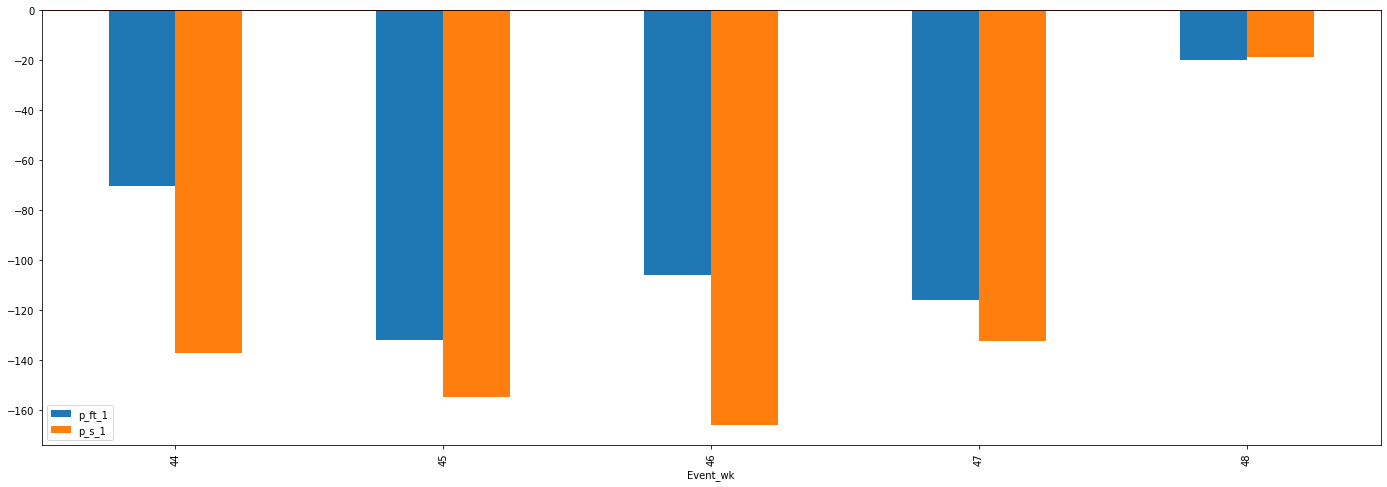

In [158]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_1','p_s_1'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


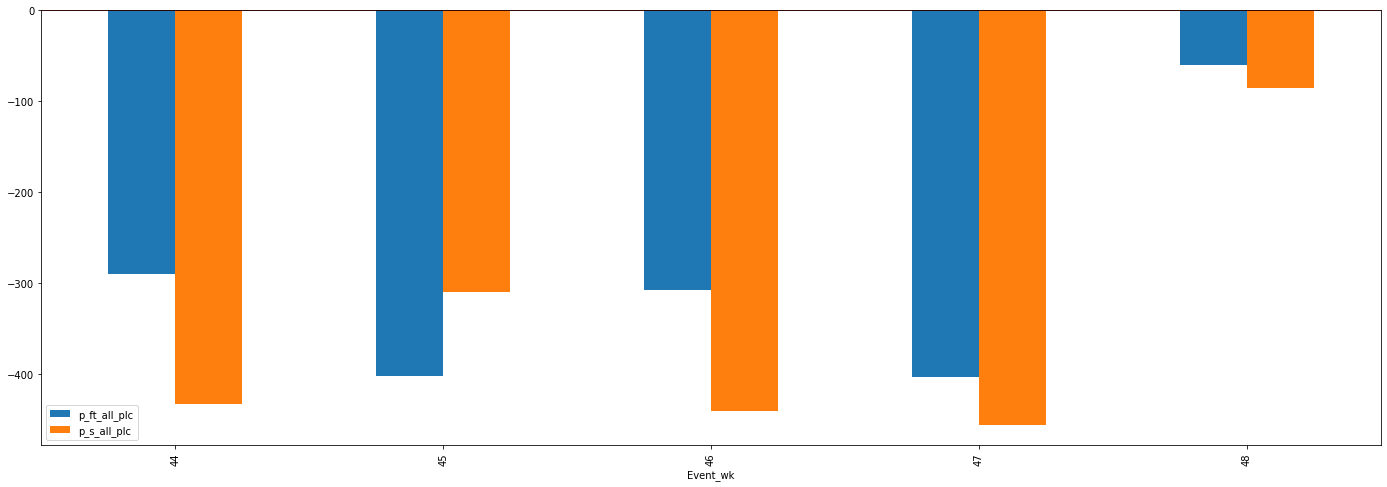

In [159]:

plt = df_plot.plot(x= rupvar[0], y=['p_ft_all_plc','p_s_all_plc'], figsize = (24,8), kind= 'bar')
plt.axhline(y=0, color='r', linestyle='-')


In [160]:

df_eval_v2['ft_sp_groups'] = df_eval_v2['ft_sp'].apply(lambda x : 'U001.5' if x <=1.5 \
                                                       else 'U002' if x<=2 \
                                                       else 'U003' if x<=3 \
                                                       else 'U004' if x<=4 \
                                                       else 'U005' if x<=5 \
                                                       else 'U007' if x<=7 \
                                                       else 'U010' if x<=10 \
                                                       else 'U015' if x<=15 \
                                                       else 'U025' if x<=25 \
                                                       else 'U040' if x<=40 \
                                                       else 'U060' if x<=60 \
                                                       else 'U100' if x<=100 else 'Other')

print(df_eval_v2['ft_sp_groups'].value_counts())
                                                       

U025      73789
U010      73218
U015      67133
U007      65147
U004      54332
U003      52425
U040      51648
U005      49039
U060      30867
U100      25511
U002      22271
Other     11380
U001.5    11257
Name: ft_sp_groups, dtype: int64


#### Export the files 

In [161]:

# Classic overestimation of Placement problems -- placing top 3 for 8, and also 3 for 7,6,5,4,3,2,1 racers (fix)
# Classic using WIN price for PLACE issue

df_eval = df_eval_v2.groupby(['preds_tie','ttflag'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum', 'ft_lay_last':'sum', 'h_ft_lay_last':'sum', 'p_ft_lay_last':'sum' ''\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum', 's_lay_last':'sum', 'h_s_lay_last':'sum', 'p_s_lay_last':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum', 'rand_lay_last':'sum', 'h_rand_lay_last':'sum', 'p_rand_lay_last':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()\
.transpose()


In [162]:

df_eval


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
preds_tie,0,0,1,1,2,2,3,3,4,4,5,5,6,6,7
ttflag,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Test,Train,Train
ft_1,3247,73751,121,3796,46,1596,32,823,11,464,5,317,1,227,252
h_ft_1,1318,30004,45,1482,19,624,9,335,4,185,0,122,0,82,96
p_ft_1,-409.3,-10363.2,-15.85,-522.09,-0.15,-233.02,-9.9,-83.02,-2.9,-50.15,-5,-52.42,-1,-52.85,-22.29
ft_all_plc,8417,186659,315,9644,117,4089,79,2150,30,1229,13,806,3,545,770
h_ft_all_plc,2291,51501,81,2605,32,1120,20,556,6,320,2,216,1,157,201
p_ft_all_plc,-1391.6,-30632.4,-54,-1547.59,-3.15,-551.27,-4.7,-423.22,-14.2,-216.45,0.2,-137.82,3.4,-45.95,-47.24
ft_lay_last,2390,53624,73,2676,30,1097,26,571,8,354,3,232,1,162,179
h_ft_lay_last,2340,52591,72,2620,29,1077,26,553,8,346,3,227,1,158,176


In [163]:

#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_totals.csv', index = True)
#df_eval.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_totals.csv', index = True)
df_eval.to_csv(f'{fileloc}/evaluation_2022-12-04_extended_totals_{mid}.csv', index = True)


In [109]:

df_res = df_eval_v2.groupby(['preds_tie','ttflag','RaceGrade_H1'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum'\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()


KeyError: 'RaceGrade_H1'

In [56]:

df_res


,preds_tie,ttflag,RaceGrade_H1,ft_1,h_ft_1,p_ft_1,ft_all_plc,h_ft_all_plc,p_ft_all_plc,s_1,h_s_1,p_s_1,s_all_plc,h_s_all_plc,p_s_all_plc,rand_1,h_rand_1,p_rand_1,rand_all_plc,h_rand_all_plc,p_rand_all_plc,@id_RACE
0,0,Test,Grade 1,16,5,-7.85,36,12,-5.25,16,5,-5.70,35,8,-18.05,16,2,-7.75,35,5,-9.95,16
1,0,Test,Grade 2,3,1,-0.80,7,1,-4.80,3,1,-0.80,7,1,-4.80,3,0,-3.00,7,1,-4.80,3
2,0,Test,Grade 3,4,3,1.80,8,3,-2.20,4,2,0.10,8,2,-3.90,4,0,-4.00,8,0,-8.00,4
3,0,Test,Grade 4,45,23,8.88,119,34,-9.82,44,10,-12.80,110,29,0.18,44,3,-27.10,110,14,-38.10,44
4,0,Test,Grade 5,1300,509,-178.43,3471,925,-525.63,1273,351,-245.18,3352,729,-664.33,1273,181,-270.23,3352,446,-799.89,1273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,7,Train,Grade 7,1,1,1.50,3,1,-0.50,8,1,-5.50,8,1,-5.50,1,0,-1.00,3,0,-3.00,1
123,7,Train,Heat,15,8,1.75,46,11,-12.95,120,15,1.15,120,15,1.15,15,1,36.00,45,4,17.60,15
124,7,Train,Mixed,38,15,-3.55,118,32,-2.85,304,38,-61.65,304,38,-61.65,38,3,-13.10,114,12,-50.60,38
125,7,Train,Other,49,22,8.85,151,38,-18.70,368,46,-158.50,368,46,-158.50,46,9,-6.10,138,21,-28.55,46


In [57]:

#df_res.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_bytrack.csv', index = True)
#df_res.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_bytrack.csv', index = True)
df_res.to_csv(f'{fileloc}/evaluation_2022-12-04_extended_byracegrade_{mid}.csv', index = True)


In [58]:


#df_find_pft = df_eval_v2.groupby(['preds_tie','ttflag','RaceGrade_H1','Winner_preds','Top3_preds','ft_sp_groups'])\
df_find_pft = df_eval_v2.groupby(['ttflag','RaceGrade_H1','Winner_preds','Top3_preds','ft_sp_groups'])\
.agg({'ft_1':'sum', 'h_ft_1':'sum', 'p_ft_1':'sum', 'ft_all_plc':'sum', 'h_ft_all_plc':'sum', 'p_ft_all_plc':'sum'\
      , 's_1':'sum', 'h_s_1':'sum', 'p_s_1' :'sum' ,'s_all_plc':'sum', 'h_s_all_plc':'sum', 'p_s_all_plc':'sum'\
      , 'rand_1':'sum', 'h_rand_1':'sum', 'p_rand_1' :'sum' ,'rand_all_plc':'sum', 'h_rand_all_plc':'sum', 'p_rand_all_plc':'sum'\
      ,'@id_RACE':'nunique' })\
.reset_index()


In [59]:

#df_res.to_csv(f'{fileloc}/evaluation_2022-10-18_extended_bytrack.csv', index = True)
#df_res.to_csv(f'{fileloc}/evaluation_2022-10-27_extended_bytrack.csv', index = True)
df_find_pft.to_csv(f'{fileloc}/evaluation_sectional_{mid}.csv', index = True)


In [60]:

print("THE END")


THE END
